# statsmodels - Assignment
---

We will work with a dataset containing basic information on computers; including the speed, ram, hd and price of computers.

Dataset obtained from [Kaggle](https://www.kaggle.com/datasets/kingburrito666/basic-computer-data-set).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Q1: Load and Explore Dataset

### 1.1 Load dataset

In [3]:
# Load dataset

computers = pd.read_csv("../Data/computers.csv")

## 1.2 Explore Price Column

- Create a histogram of price
- Create a boxplot of price

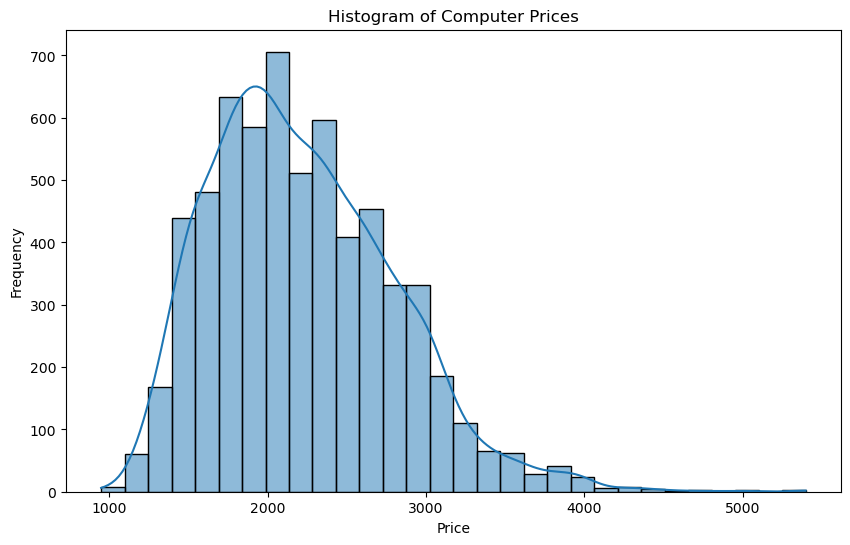

In [6]:
# Price histogram

plt.figure(figsize=(10, 6))
sns.histplot(computers['price'], bins=30, kde=True)
plt.title('Histogram of Computer Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

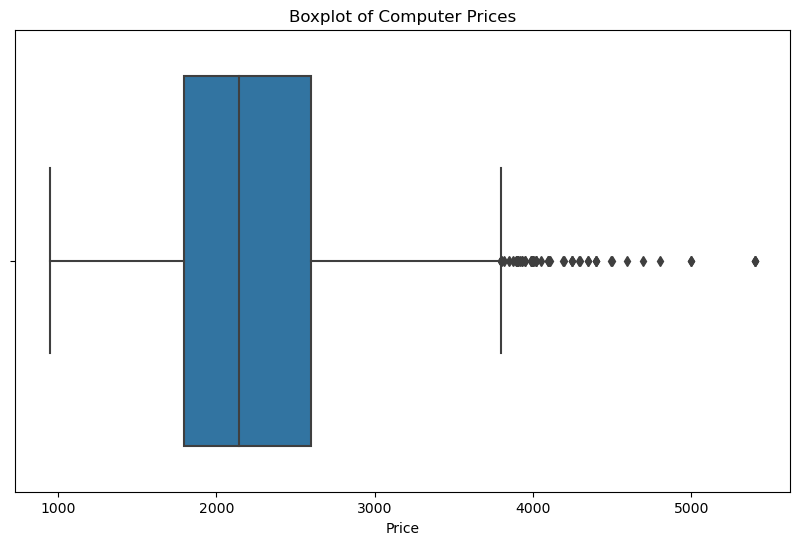

In [7]:
# Price boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=computers['price'])
plt.title('Boxplot of Computer Prices')
plt.xlabel('Price')
plt.show()

## 1.3 Correlations

Create a correlation matrix, and pass it into a heatmap. Which 2 features have the highest correlation with price?

In [28]:
# Correlation matrix

# Select only numeric columns for correlation matrix

numeric_columns = computers.select_dtypes(include=[np.number])

# Create a correlation matrix

corr_matrix = numeric_columns.corr()
corr_matrix

,price,speed,hd,ram,screen,ads,trend,log_hd
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987,0.459741
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438,0.394164
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790,0.931394
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844,0.738484
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614,0.257306
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553,-0.260021
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000,0.566811
log_hd,0.459741,0.394164,0.931394,0.738484,0.257306,-0.260021,0.566811,1.000000


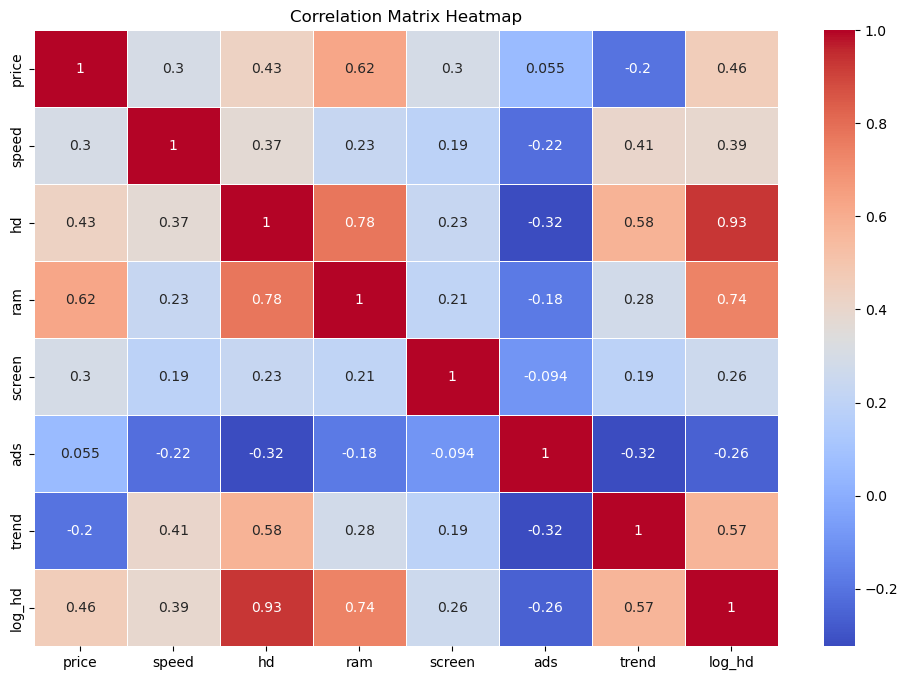

In [30]:
# Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
# Identify the two features with the highest correlation with price

corr_with_price = corr_matrix['price'].sort_values(ascending=False).drop("price").head(2)
corr_with_price

ram       0.622748
log_hd    0.459741
Name: price, dtype: float64

## Q2: Fit first Model

### 2.1 Fit a model (with statsmodels) using `hd`, `ram` and `screen`.

In [18]:
# Answer here

# Define the independent variables (hd, ram, screen) and the dependent variable (price)

X = computers[['hd', 'ram', 'screen']]
y = computers['price']

# Add a constant to the independent variables matrix

X = sm.add_constant(X)

# Fit the model

model = sm.OLS(y, X).fit()

### 2.2 Plot the Residuals

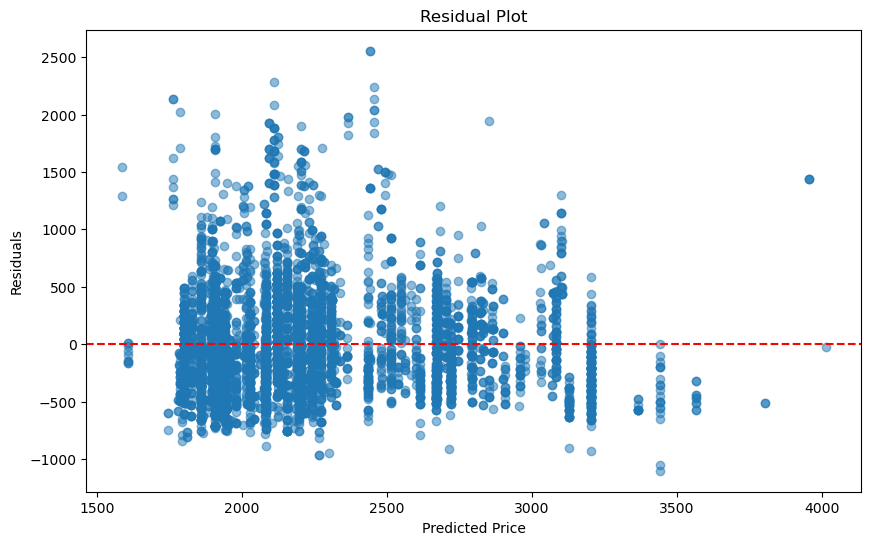

In [17]:
# Residual plot

# Calculate the residuals
residuals = y - model.predict(X)

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X), residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 2.3 Print the Summary Statistics

Print the summary statistics, and explain what the coefficients mean.
Notice that the coefficient for hd is negative, which intuitevly doesn't make sense (we assume that as a computer's hard drive capacity increases, so does its price). How can you explain this negative coefficient?

In [19]:
# Summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:42:45   Log-Likelihood:                -46968.
No. Observations:                6259   AIC:                         9.394e+04
Df Residuals:                    6255   BIC:                         9.397e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1434     90.686      0.255      0.799    -154.632     200.919
hd            -0.3817      0.034    -11.095      0.000      -0.449      -0.314
ram           73.8539      1.571     47.014      0.000      70.774      76.933
screen       119.3418      6.317     18.892      0.000     106.958     131.725
==============================================================================
Omnibus:                     1519.426   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4142.756
Skew:                           1.288   Prob(JB):                         0.00
Kurtosis:                       6.041   Cond. No.                     8.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: 0.428, this indicates that approximately 42.8% of the variance in the price can be explained by the model. This is a moderate level of explanatory power.

Adj. R-squared: 0.428, the Adjusted R-squared is the same as the R-squared because no additional variables were added. It adjusts for the number of predictors in the model.

F-statistic: 1559.0, the F-statistic tests if the model as a whole is significant. A high value indicates that the model is likely a good fit for the data.

Coefficients:

const (Intercept): 23.1434, the intercept is not statistically significant (p-value = 0.799), indicating that when all predictors are zero, the price does not necessarily reflect a meaningful value.

hd (Hard Drive Capacity): -0.3817, the coefficient is negative, which seems counterintuitive since we expect prices to increase with larger hard drive capacities. This might be due to the need for a logarithmic transformation or an issue with the data or model specification.

The negative coefficient for hd is indeed counterintuitive. Possible explanations include:

Model Specification Issue: The model might be missing important variables or interactions. For instance, if hd should have a nonlinear effect, consider transforming it (e.g., using the logarithm of hd).

Data Quality: There could be data quality issues or outliers affecting the result. Inspect the data to ensure it's clean and representative.

Multicollinearity: If hd is highly correlated with another predictor (such as ram), it might be causing multicollinearity issues. Check for multicollinearity using Variance Inflation Factor (VIF).

ram (RAM): 73.8539, this positive coefficient is expected; more RAM increases the price.

screen (Screen Size): 119.3418, this positive coefficient is also expected; larger screens increase the price.

## Q3: Fit Second Model

### 3.1 Fit another model. This time add `trend` and `ads`. 

In [34]:
# Answer here

# Define the independent variables (including trend and ads) and the dependent variable (price)

X = computers[['hd', 'ram', 'screen', 'trend', 'ads']]
y = computers['price']

# Add a constant to the independent variables matrix

X = sm.add_constant(X)

# Fit the model

model2 = sm.OLS(y, X).fit()

### 3.2 Plot the Residuals

What do you notice?

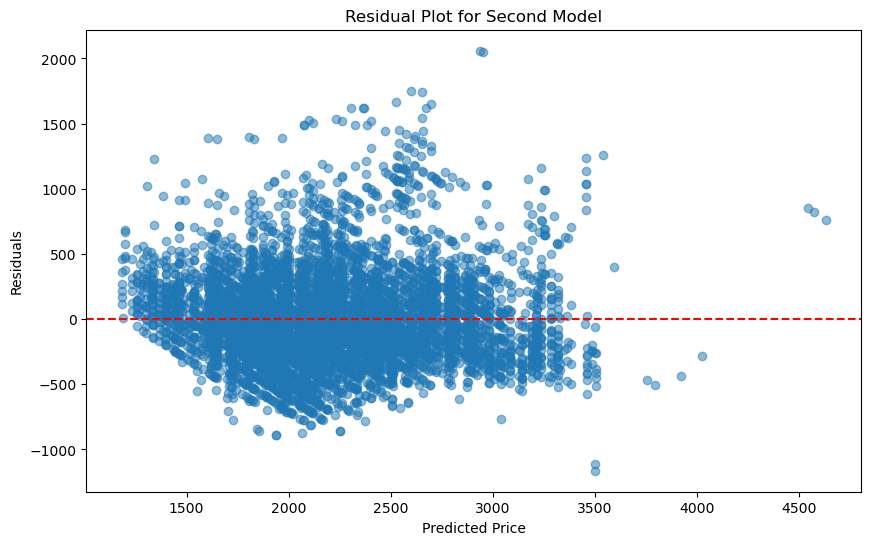

In [33]:
# Residual plot

# Calculate the residuals for the second model
residuals2 = y - model2.predict(X)

# Plot the residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(model2.predict(X), residuals2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot for Second Model')
plt.show()

### 3.3 Print Summary Statistics

What happened to the overall performance? Does adding trend and ads help the model perform better?
Are there any changes in the coefficients?

In [35]:
# Answer here

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2119.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:09:19   Log-Likelihood:                -45614.
No. Observations:                6259   AIC:                         9.124e+04
Df Residuals:                    6253   BIC:                         9.128e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -182.6642     75.361     -2.424      0.015    -330.398     -34.930
hd             0.8510      0.035     24.384      0.000       0.783       0.919
ram           46.7097      1.349     34.631      0.000      44.066      49.354
screen       145.9778      5.109     28.570      0.000     135.962     155.994
trend        -40.8628      0.749    -54.520      0.000     -42.332     -39.394
ads            0.8084      0.064     12.578      0.000       0.682       0.934
==============================================================================
Omnibus:                     1119.813   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2552.120
Skew:                           1.023   Prob(JB):                         0.00
Kurtosis:                       5.366   Cond. No.                     8.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second model with trend and ads included has a higher R-squared (62.9%) compared to the first model (42.8%). This indicates an improvement in model performance with the additional predictors.

The coefficient for hd changed from negative to positive, indicating that including trend and ads has corrected the initial issue with hd. Other coefficients have adjusted accordingly, reflecting their relationships with price.
Residuals:

The Durbin-Watson statistic improved, suggesting reduced autocorrelation in the residuals.
Residuals still show non-normality, but the improvement is notable.

## Q4: Calculate Metrics

Calculate the MSE and RMSE for the model fitted on ALL numeric features.

In [37]:
# Answer here

from sklearn.metrics import mean_squared_error

# Define the independent variables (all numeric features) and the dependent variable (price)

X_all_numeric = computers[['speed', 'hd', 'ram', 'screen', 'ads', 'trend']]
y_all_numeric = computers['price']

# Add a constant to the independent variables matrix

X_all_numeric = sm.add_constant(X_all_numeric)

# Fit the model with all numeric features

model_all_numeric = sm.OLS(y_all_numeric, X_all_numeric).fit()

# Calculate predictions

predictions_all_numeric = model_all_numeric.predict(X_all_numeric)

# Calculate residuals

residuals_all_numeric = y_all_numeric - predictions_all_numeric

# Calculate MSE and RMSE

mse = mean_squared_error(y_all_numeric, predictions_all_numeric)
rmse = np.sqrt(mse)

print(f"MSE = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")

MSE = 97033.34
RMSE = 311.50


## Q5: Assumptions

## 5.1 Assess Linearity and fix if necessary.

Create a pairplot to visualize the relationship between the different numeric variables.

C:\Users\info\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


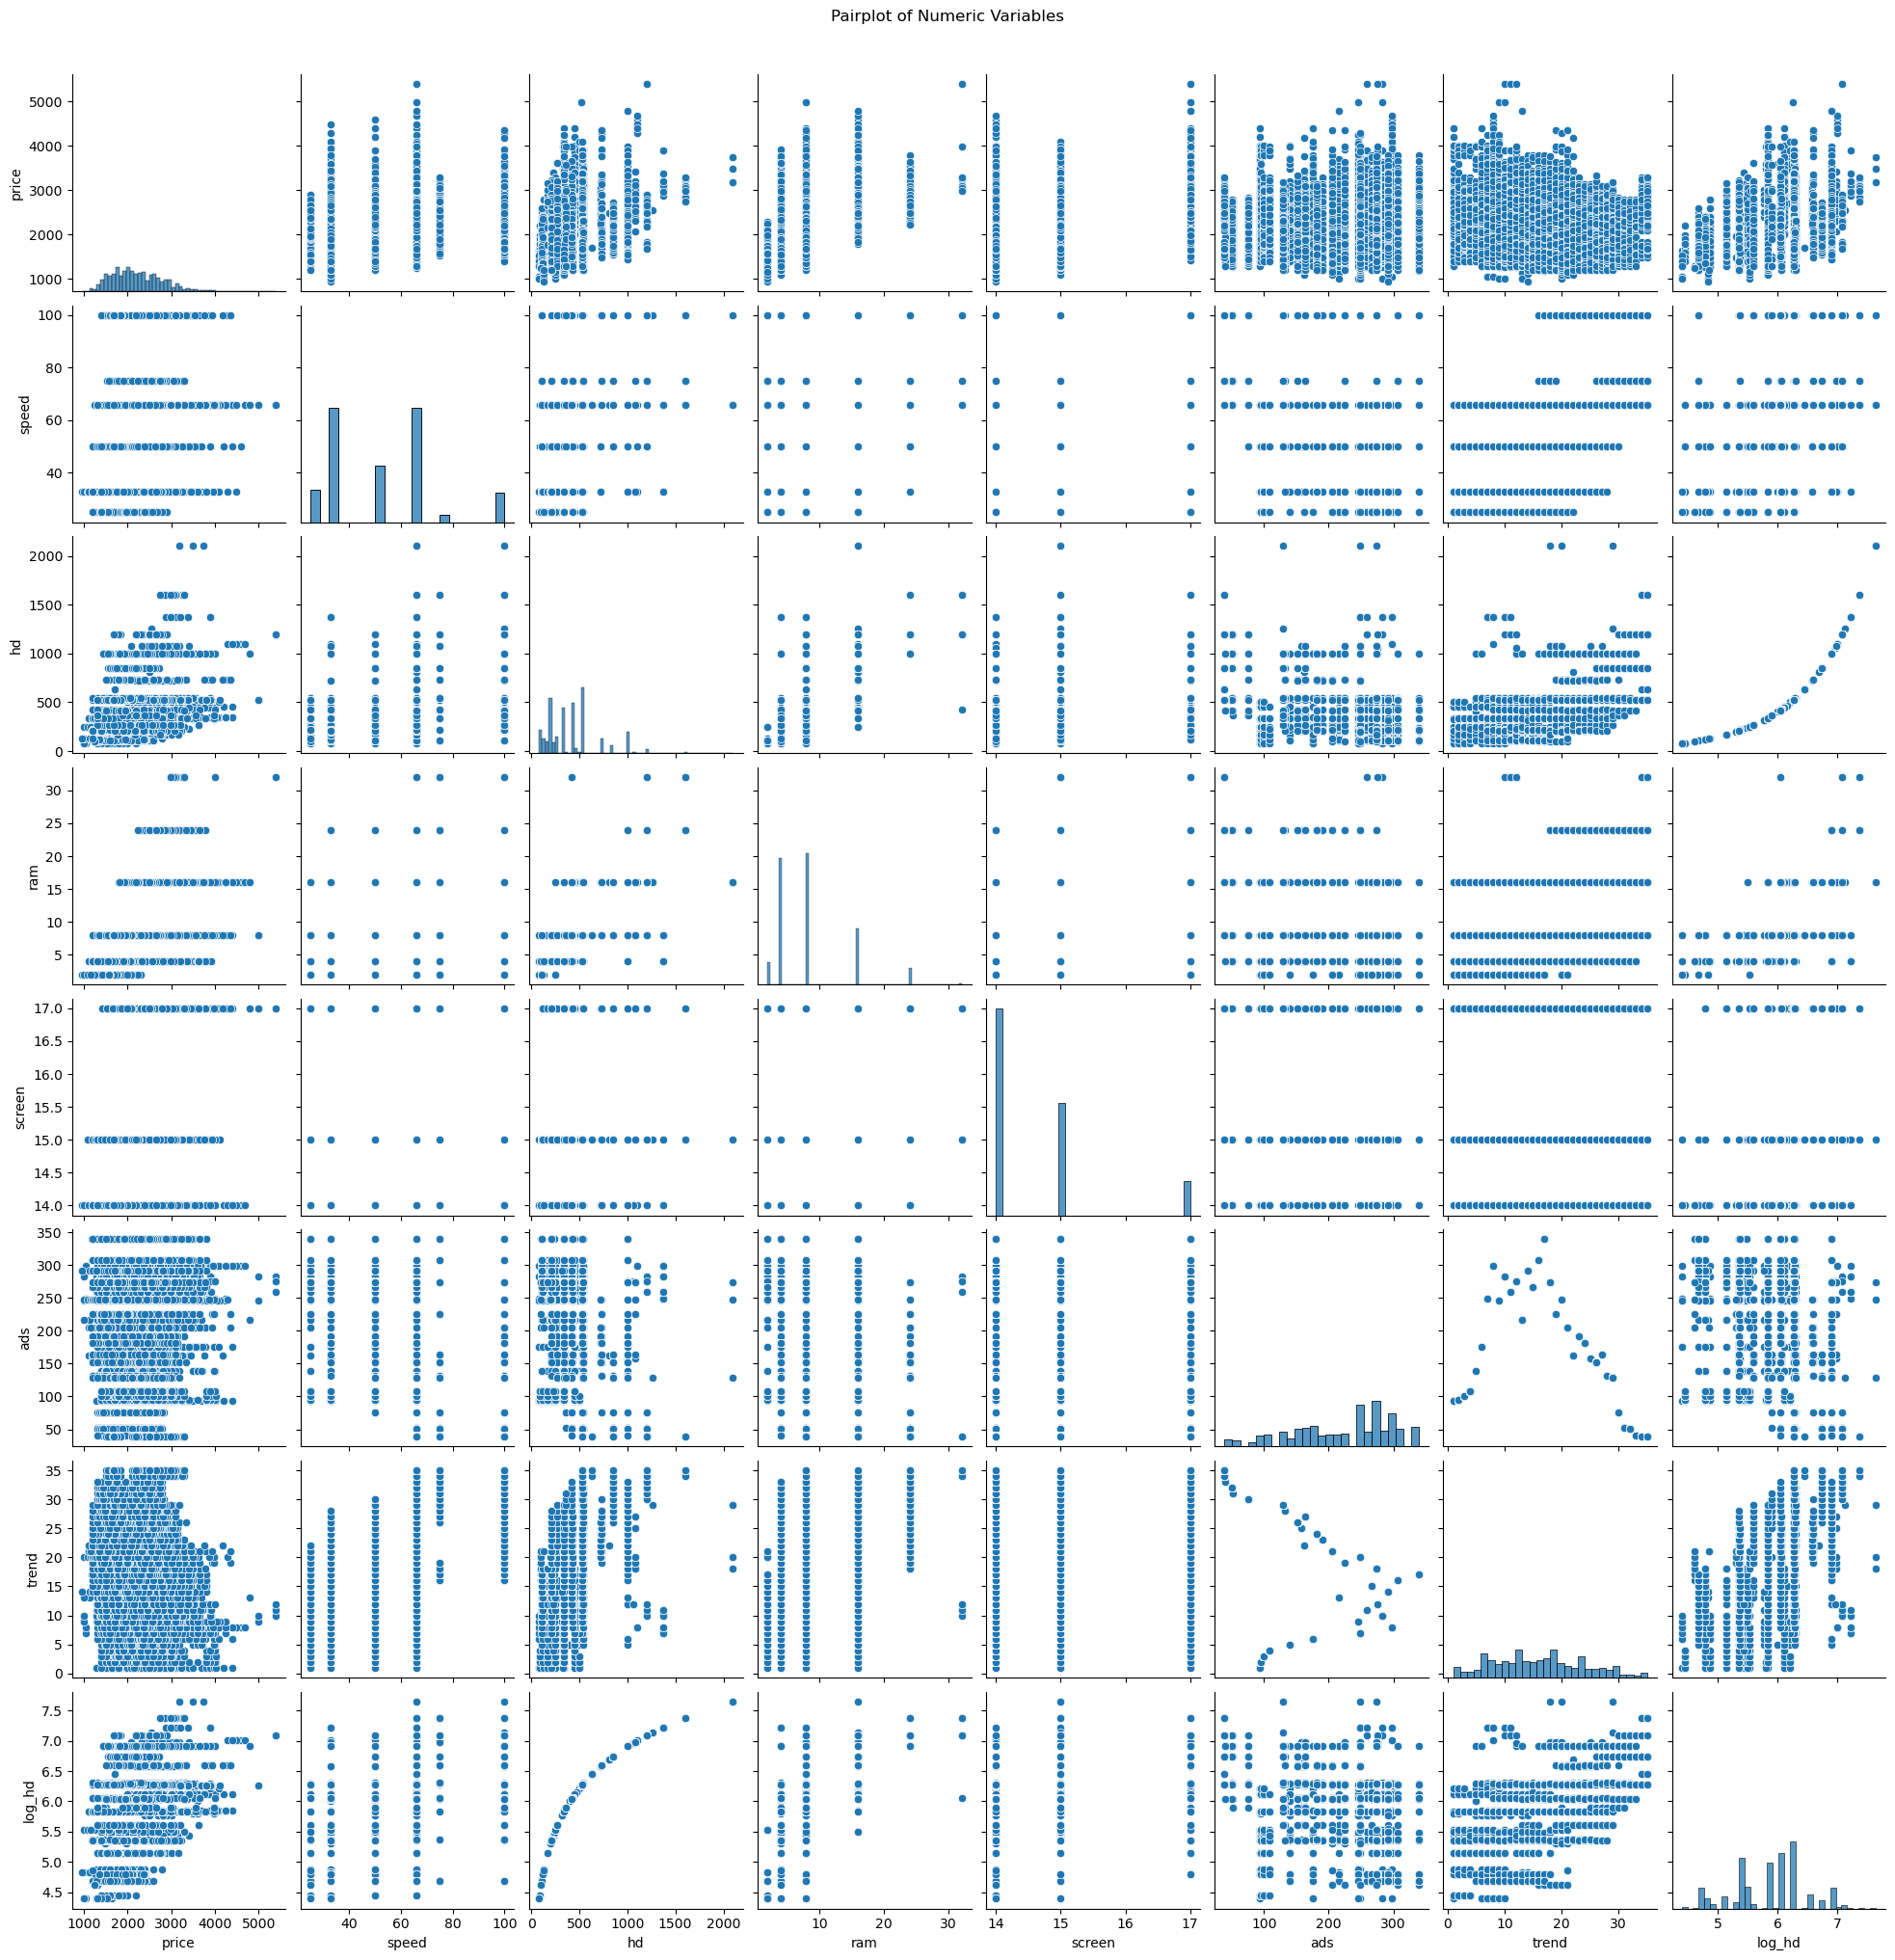

In [39]:
# Pairplot

# Select numeric columns for pairplot

numeric_columns = computers.select_dtypes(include=['number'])

# Create pairplot

sns.pairplot(numeric_columns)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

### 5.2 Assess Independence of Errors and Fix if Necessary

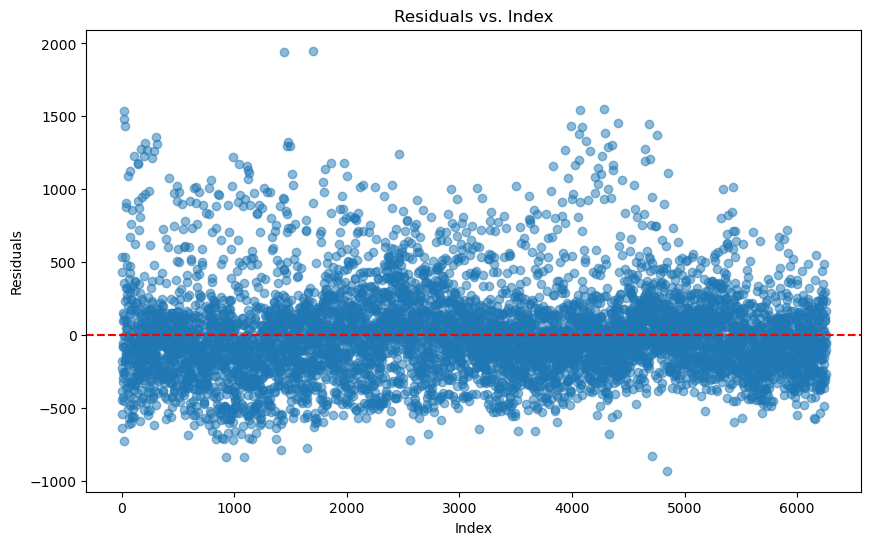

In [41]:
# Calculate residuals

residuals = y_all_numeric - model_all_numeric.predict(X_all_numeric)

# Plot residuals vs. index to check for patterns

plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='None', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals vs. Index')
plt.show()

### 5.3 Assess Normality of Errors and Fix if Necessary

Create a residual plot and a QQ Plot to determine whether the residuals are normally distributed.

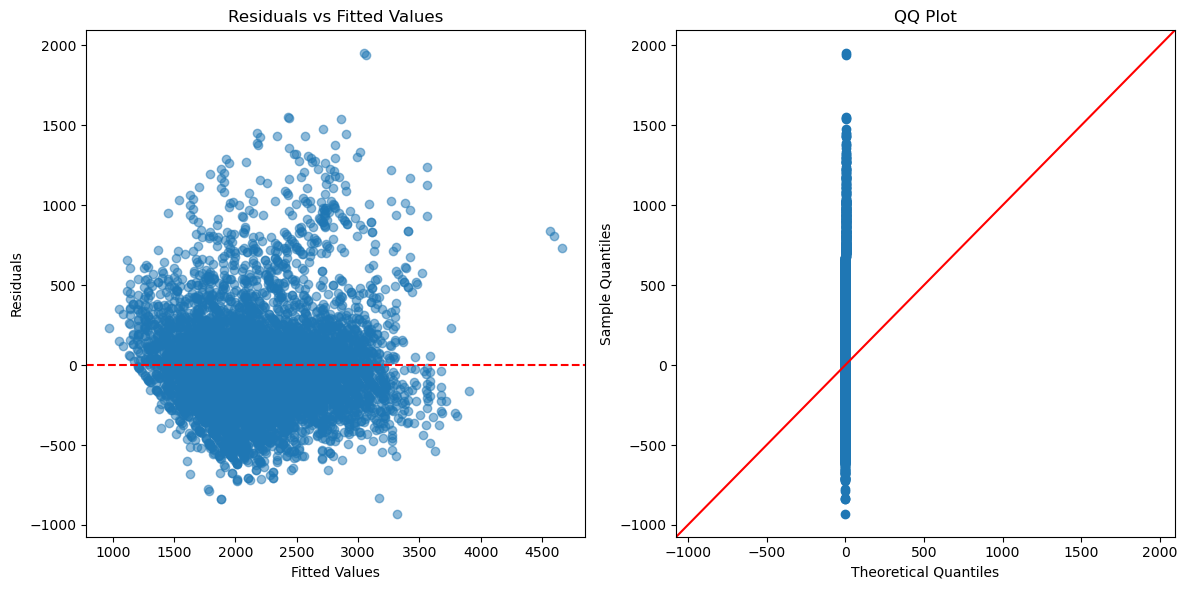

In [40]:
# Answer here

# Calculate residuals

residuals_all_numeric = y_all_numeric - model_all_numeric.predict(X_all_numeric)

# Residual Plot

plt.figure(figsize=(12, 6))

# Residual vs Fitted Plot

plt.subplot(1, 2, 1)
plt.scatter(model_all_numeric.predict(X_all_numeric), residuals_all_numeric, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# QQ Plot

plt.subplot(1, 2, 2)
sm.qqplot(residuals_all_numeric, line ='45', ax=plt.gca())
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

### 5.4 Assess Impact (if any) of Outliers

Calculate and print the VIF for all features, and assess whether there are any influential outliers.

Leverage:
[0.00184486 0.00182169 0.00194427 ... 0.00245278 0.00197428 0.00260724]

Cook's Distance:
[7.96494035e-04 1.35816760e-04 1.15860081e-03 ... 2.58559947e-04
 2.85071604e-05 1.26538480e-05]


C:\Users\info\AppData\Local\Temp\ipykernel_13840\1813855160.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(cooks_d)), cooks_d, use_line_collection=True)


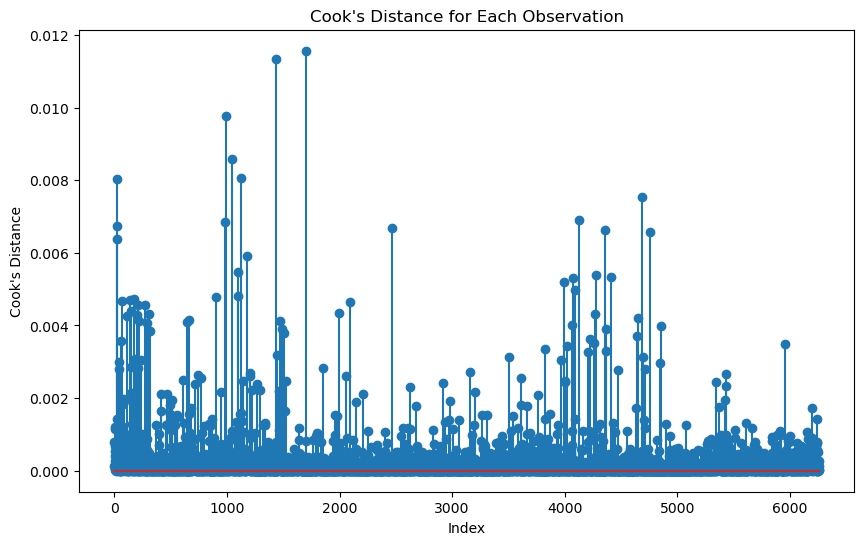

C:\Users\info\AppData\Local\Temp\ipykernel_13840\1813855160.py:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(leverage)), leverage, use_line_collection=True)


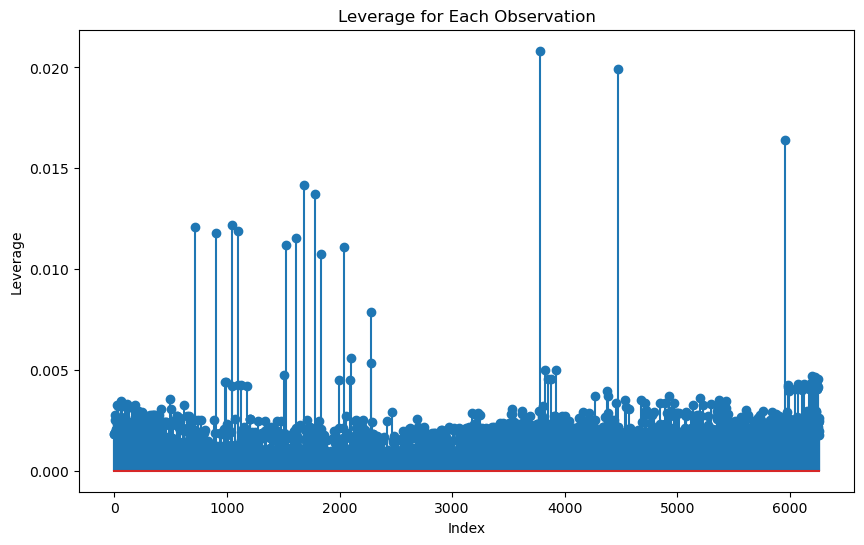

In [43]:
# Answer here

# Leverage and Cook's Distance

influence = model_all_numeric.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Print leverage and Cook's Distance

print("Leverage:")
print(leverage)
print("Cook's Distance:")
print(cooks_d)

# Plot Cook's Distance

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, use_line_collection=True)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for Each Observation')
plt.show()

# Plot Leverage

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(leverage)), leverage, use_line_collection=True)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage for Each Observation')
plt.show()

## Q6: Final Model

### 6.1 Create final model

Create a final model with
- all features, including categorical features. You will need to perform one-hot encoding.
- squared (polynomial) terms for ram, trend and hd
- log transformed target variable

In [53]:
# Perform one-hot encoding for categorical variables

computers_encoded = pd.get_dummies(computers, columns=['cd', 'multi', 'premium'], drop_first=True)

# Add polynomial terms

computers_encoded['ram_squared'] = computers_encoded['ram'] ** 2
computers_encoded['trend_squared'] = computers_encoded['trend'] ** 2
computers_encoded['hd_squared'] = computers_encoded['hd'] ** 2

# Log-transform the target variable

computers_encoded['log_price'] = np.log(computers_encoded['price'])

# Convert boolean columns to integers

bool_cols = ['cd_yes', 'multi_yes', 'premium_yes']
for col in bool_cols:
    computers_encoded[col] = computers_encoded[col].astype(int)

# Define features and target variable

features = ['hd', 'ram', 'screen', 'ads', 'trend', 'ram_squared', 'trend_squared', 'hd_squared'] + \
            [col for col in computers_encoded.columns if col.startswith('cd_') or col.startswith('multi_') or col.startswith('premium_')]
X = computers_encoded[features]
y = computers_encoded['log_price']

# Add a constant to the independent variables matrix

X = sm.add_constant(X)

# Fit the final model

final_model = sm.OLS(y, X).fit()

# Print the summary of the final model

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1454.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:33:36   Log-Likelihood:                 3572.2
No. Observations:                6259   AIC:                            -7120.
Df Residuals:                    6247   BIC:                            -7040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8184      0.030    226.301      0.000       6.759       6.877
hd                0.0008   3.31e-05     23.043      0.000       0.001       0.001
ram               0.0343      0.002     21.192      0.000       0.031       0.038
screen            0.0587      0.002     29.542      0.000       0.055       0.063
ads               0.0002   4.74e-05      3.859      0.000    8.99e-05       0.000
trend            -0.0224      0.002    -14.213      0.000      -0.025      -0.019
ram_squared      -0.0006   5.91e-05    -10.137      0.000      -0.001      -0.000
trend_squared  4.155e-05   4.93e-05      0.843      0.399   -5.51e-05       0.000
hd_squared    -2.735e-07   2.27e-08    -12.061      0.000   -3.18e-07   -2.29e-07
cd_yes            0.0397      0.005      8.279      0.000       0.030       0.049
multi_yes         0.0467      0.006      8.224      0.000       0.036       0.058
premium_yes      -0.2245      0.006    -36.402      0.000      -0.237      -0.212
==============================================================================
Omnibus:                       59.774   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.838
Skew:                           0.104   Prob(JB):                     1.39e-19
Kurtosis:                       3.538   Cond. No.                     7.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6.2 Which feature can be removed without impacting the R-squared score?

"trend_squared" has a p-value of 0.399, indicating it's not statistically significant. Removing it is unlikely to affect the R-squared score much.

### 6.3 Create a Residuals and a QQ Plot for Final Model

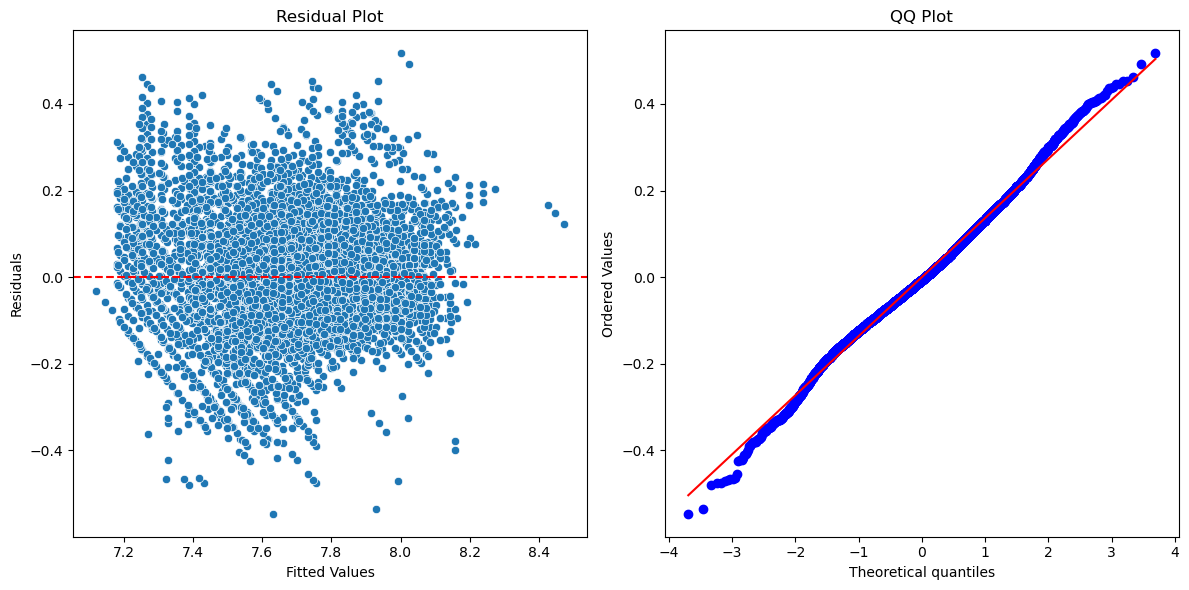

In [55]:
# Answer here

import scipy.stats as stats

# Extract residuals

residuals = final_model.resid

# Create a Residual Plot

plt.figure(figsize=(12, 6))

# Residual Plot

plt.subplot(1, 2, 1)
sns.scatterplot(x=final_model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Create a QQ Plot

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

# Good job!